In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('twitter_training.csv')

In [3]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
data = pd.read_csv('twitter_training.csv', names=col_names)


In [6]:
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
data.shape

(74682, 4)

In [11]:
data.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [12]:
data.isnull().sum()


,0
ID,0
Entity,0
Sentiment,0
Content,686


In [13]:
data.dropna(axis=0 , inplace=True)


In [14]:
data.isnull().sum()

,0
ID,0
Entity,0
Sentiment,0
Content,0


In [16]:
data.duplicated().sum()

2340

In [17]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()


0

In [18]:
data.shape

(71656, 4)

In [19]:
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts


,count
Sentiment,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


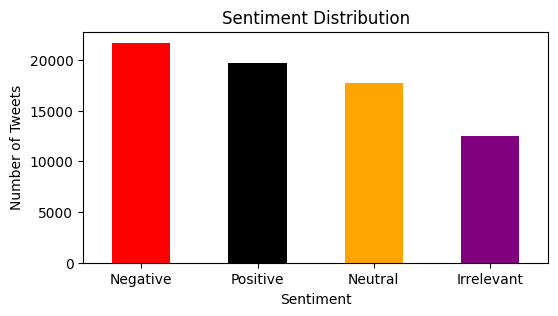

In [20]:
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color=['red', 'black', 'orange', 'purple'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()


In [21]:
brand_data = data[data['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts = brand_data['Sentiment'].value_counts()
brand_sentiment_counts


,count
Sentiment,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


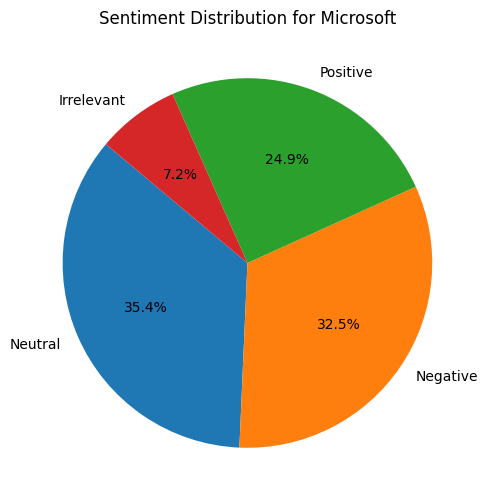

In [22]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Microsoft')
plt.show()